<a href="https://colab.research.google.com/github/tushar9764/project1/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Netflix Exploratory Data Analysis (EDA)

This notebook performs an Exploratory Data Analysis (EDA) on the Netflix Movies & TV Shows dataset.

#About the dataset
The Netflix Movies & TV Shows dataset can be found on Kaggle. It contains all TV Shows and Movies metadata available on Netflix. The dataset is updated every month. It contains 8807 records and 12 columns.

Netflix was founded on August 29, 1997, as a mail-based rental business. In January 2007, the company launched a streaming media service, introducing video on demand via the Internet.

#Objective of the EDA
The objective of the EDA is to identify the trends in the number of movies and T.V. shows on platform with respect to various parameters such as rating, release year, director of the movie/T.V. show, etc.

#1. Setting up the notebook

In [ ]:
pip install bar_chart_race

     |████████████████████████████████| 156 kB 8.2 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from wordcloud import WordCloud, STOPWORDS
import bar_chart_race as bcr

The above code cells install and import important libraries and packages.

In [ ]:
pd.set_option('max_rows', 100)
pd.set_option('max_colwidth', 20)

The above code cell sets the maximum limits for number of rows displayed and width of columns for dataframes.

In [ ]:
df = pd.read_csv('/content/netflix_titles.csv') # loading the dataset
df # display

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is ...,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,As her father ne...
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khos...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV...,After crossing p...
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, T...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, ...",To protect his f...
3,s4,TV Show,Jailbirds New Or...,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Real...","Feuds, flirtatio..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jite...",India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV...,In a city of coa...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Ja...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dra...",A political cart...
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean...",While living alo...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg,...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror...",Looking to survi...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Court...",United States,"January 11, 2020",2006,PG,88 min,Children & Famil...,Dragged from civ...


The above code cell reads the csv file into a dataframe which is assigned to df and displays the head (top 5 rows) and tail (bottom 5 rows) of the dataframe.

#2. Data summarization and summary statistics

In [ ]:
type(df) # Mahendra Pooniya

pandas.core.frame.DataFrame

The above code cell prints the type of the dataframe object.

In [ ]:
df.shape # Mahendra Pooniya

(8807, 12)

The above code cell prints the total no. of rows and columns.

In [ ]:
df.columns # Mahendra Pooniya

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

The above code cell prints the names of the columns in the dataframe. We will be using the type, title, cast, country, release_year, rating, duration and listed_in columns for our data visualisations.

In [ ]:
df.head(10) # Mahendra Pooniya

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is ...,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,As her father ne...
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khos...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV...,After crossing p...
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, T...",NaN,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his f...
3,s4,TV Show,Jailbirds New Or...,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,Docuseries,"Feuds, flirtatio..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jite...",India,2021-09-24,2021,TV-MA,2 Seasons,International TV...,In a city of coa...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zac...",NaN,2021-09-24,2021,TV-MA,1 Season,TV Dramas,The arrival of a...
6,s7,Movie,My Little Pony: ...,"Robert Cullen, J...","Vanessa Hudgens,...",NaN,2021-09-24,2021,PG,91 min,Children & Famil...,Equestria's divi...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oy...","United States, G...",2021-09-24,1993,TV-MA,125 min,Dramas,On a photo shoot...
8,s9,TV Show,The Great Britis...,Andy Devonshire,"Mel Giedroyc, Su...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,British TV Shows,A talented batch...
9,s10,Movie,The Starling,Theodore Melfi,Melissa McCarthy...,United States,2021-09-24,2021,PG-13,104 min,Comedies,A woman adjustin...


The above code cell prints the top 10 rows of dataframe.

In [ ]:
df.tail(10) # Mahendra Pooniya

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8797,s8798,TV Show,Zak Storm,NaN,Michael Johnston...,"United States, F...","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak ...
8798,s8799,Movie,Zed Plus,Chandra Prakash ...,"Adil Hussain, Mo...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas...",A philandering s...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar,...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, Internat...",A change in the ...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Faw...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,International TV...,"Strong-willed, m..."
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Sal...",United Arab Emir...,"March 9, 2016",2015,TV-MA,96 min,"Dramas, Internat...",Recovering alcoh...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Ja...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dra...",A political cart...
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean...",While living alo...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg,...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror...",Looking to survi...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Court...",United States,"January 11, 2020",2006,PG,88 min,Children & Famil...,Dragged from civ...
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, S...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, Internat...",A scrappy but po...


The above code cell prints the last 10 rows of dataframe.

In [ ]:
df.info() # Mahendra Pooniya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


The above code cell prints information like datatype and non-null count about all the columns in the dataframe.

In [ ]:
df.describe() # Tushar Dhotre

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


The above code cell prints important statistics for the numerical column of the dataframe (release_year).

#3. Data Cleaning

In [ ]:
df.isnull().sum().sort_values(ascending=False) # Tushar Dhotre

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
description        0
listed_in          0
release_year       0
title              0
type               0
show_id            0
dtype: int64

The above code cell prints the total number of null values which are present in all the colums of the data frame.
From this information we understand that the director, country, cast colums have the most number of null values/missing data.

In [ ]:
df['show_id'].duplicated().any()

False

We know that the show_id column contains ids which are unique for the movies and TV shows in the dataset. The result of the above code cell tells us that none of the show ids have been repeated in the dataset and therefore no movie or TV show has been duplicated.

In [ ]:
df['date_added']= pd.to_datetime(df['date_added'].str.strip(), format= "%B %d, %Y") 
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is ...,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,As her father ne...
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khos...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV...,After crossing p...
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, T...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, ...",To protect his f...
3,s4,TV Show,Jailbirds New Or...,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Real...","Feuds, flirtatio..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jite...",India,2021-09-24,2021,TV-MA,2 Seasons,International TV...,In a city of coa...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Ja...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dra...",A political cart...
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean...",While living alo...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg,...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror...",Looking to survi...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Court...",United States,2020-01-11,2006,PG,88 min,Children & Famil...,Dragged from civ...


The above code cell changes the dates in the date_added column to the datetime format, with the rows ordered from latest to earliest date in the date_added column.

In [ ]:
df.sort_values('date_added')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5957,s5958,Movie,To and From New ...,Sorin Dan Mihalc...,"Barbara King, Sh...",United States,2008-01-01,2006,TV-MA,81 min,"Dramas, Independ...",While covering a...
6611,s6612,TV Show,Dinner for Five,NaN,NaN,United States,2008-02-04,2007,TV-MA,1 Season,Stand-Up Comedy ...,"In each episode,..."
5956,s5957,Movie,Just Another Lov...,Ole Bornedal,Anders W. Berthe...,Denmark,2009-05-05,2007,TV-MA,104 min,"Dramas, Internat...",When he causes a...
5955,s5956,Movie,Splatter,Joe Dante,"Corey Feldman, T...",United States,2009-11-18,2009,TV-MA,29 min,Horror Movies,After committing...
7370,s7371,Movie,Mad Ron's Prevue...,Jim Monaco,"Nick Pawlow, Jor...",United States,2010-11-01,1987,NR,84 min,"Cult Movies, Hor...",This collection ...
...,...,...,...,...,...,...,...,...,...,...,...,...
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit a...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, ...",United States,NaT,2012,TV-14,3 Seasons,International TV...,This irreverent ...
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,Marc Maron stars...
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Ja...",United States,NaT,2015,NR,13 Seasons,TV Action & Adve...,This parody of f...


The above code cell changes the dates in the date_added column to the datetime format, with the rows ordered from earliest to latest date in the date_added column.

#3. Data Visualisations

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


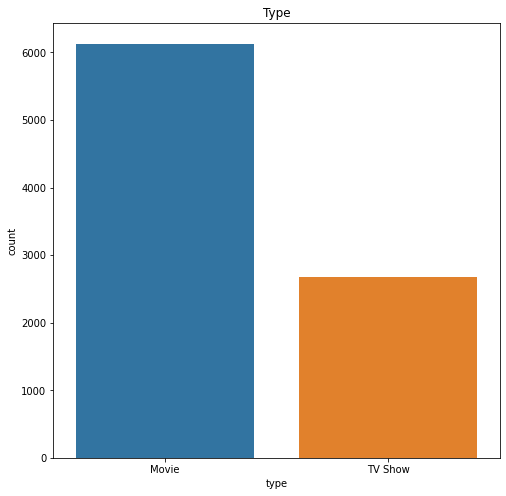

In [ ]:
# Kartik Bhamare

sns.countplot(df['type'])                 
plt.gcf().set_size_inches(8,8)
plt.title('Type');

The above code cell gives us a visual representation of total movies and tv shows, in which the blue bar represents all movies and the orange bar represents all tv shows available on Netflix.

Text(0, 0.5, 'No. of movies and TV shows')

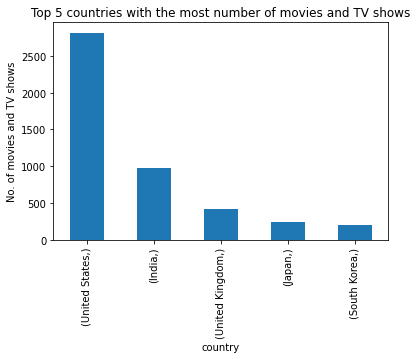

In [ ]:
# Aditya Tiwari

plt.title('Top 5 countries with the most number of movies and TV shows')
df.loc[:, ['country']].value_counts().nlargest(5).plot(kind='bar') 
plt.ylabel('No. of movies and TV shows')

The above code cell plots bar graphs for the total number of movies and TV shows based on the country or countries they were made in.

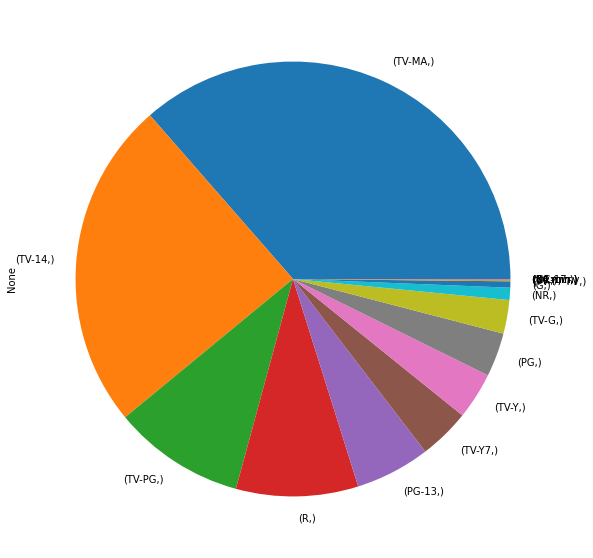

In [ ]:
# Aditya Tiwari

df.loc[:, ['rating']].value_counts().plot(kind='pie', figsize=(10,10))                         

The above code cell plots a pie chart which shows the proportions of the movies and TV shows with a particular rating.

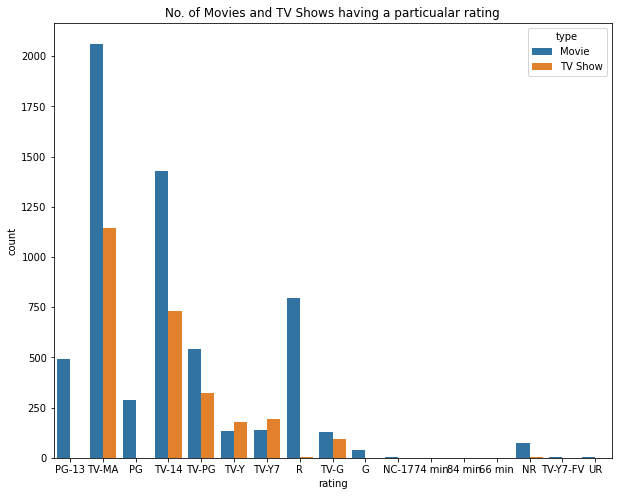

In [ ]:
#Kartik Bhamare

plt.figure(figsize=(10,8))                                                                
sns.countplot(x='rating',hue='type',data=df)
plt.title('No. of Movies and TV Shows having a particualar rating')
plt.show();

The above code cell returns a grouped bar chart which plots the number of movies (blue) and TV shows (orange) for each type of rating.

Text(0, 0.5, 'time duration')

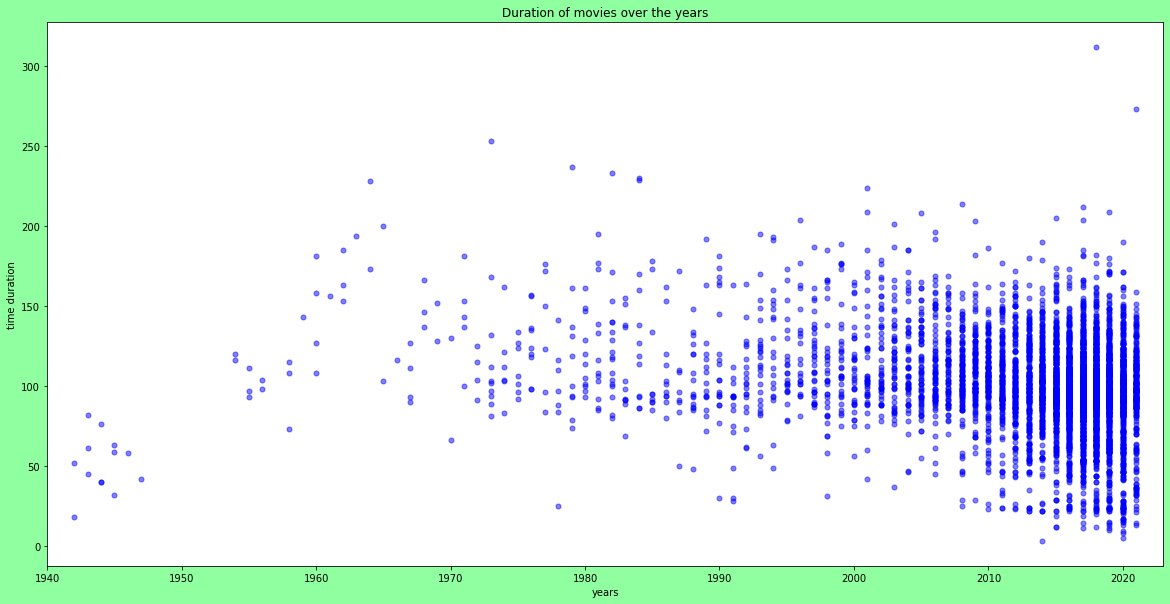

In [ ]:
#Aakash Chaurasia and Aditya Tiwari

x=df[df['type']=='Movie']          
y=df[df['type']=='Movie']
jj=y.iloc[:,[7,8,9]]
time=y.iloc[:,9]
years=y.iloc[:,7]
v=time.values
new_value_of_years=years.values
newarray=[]
for j in range(len(v)):
    if type(v[j]) != float:
      v2=int(v[j][:-4])
    newarray.append(v2)
    j=j+1

fig = plt.figure(figsize=(20,10))
fig.set_facecolor("xkcd:mint green")
ax = fig.add_subplot(111, title = "Duration of movies over the years")
ax.scatter(new_value_of_years, newarray, s=25, color="blue", alpha=0.5)

#plt.scatter(new_value_of_years,newarray)
plt.xlim(1940,2023)
plt.xlabel("years")
plt.ylabel("time duration")


the above code cell represents the relation between the release year and duration of all movies released in that year.each dot represents a movie and y coordinate represents its duration while the x coordinate represents the released year of the movie.from this visualition we relized that the number of movies with a short duration increase and the oerall number of movies incerase significantly.-

Text(0, 0.5, 'time duration')

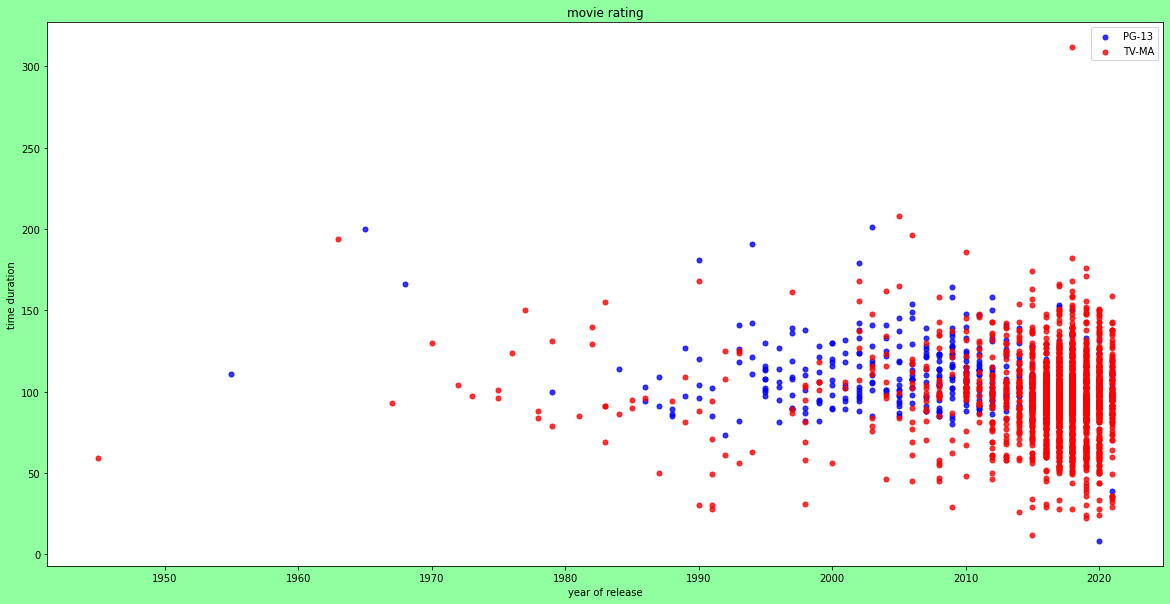

In [ ]:
# Aakash Chaurasia and Aditya Tiwari

x=df[df['type']=='Movie']       
y=df[df['rating']=='PG-13']
y2=x[x['rating']=='TV-MA']

jj=y.iloc[:,[7,8,9]]
jj2=y2.iloc[:,[7,8,9]]

time=y.iloc[:,9]
time2=y2.iloc[:,9]

years=y.iloc[:,7]
years2=y2.iloc[:,7]

v=time.values
v_das=time2.values

new_value_of_years=years.values
new_value_of_years2=years2.values

newarray=[]
newarray2=[]
for j in range(len(v)):
    v2=v[j]
    if(j==135):
        vn=slice(0,2)
    else:
        vn=slice(0,3)
    v3=v2[vn]
    v4=int(v3)
    newarray.append(v4)
    j=j+1

for j in range(len(v_das)):
    v2=v_das[j]
    vn=slice(0,3)
    v3=v2[vn]
    v4=int(v3)
    newarray2.append(v4)
    j=j+1    
 
#new_value_of_years ##released years of movie

fig = plt.figure(figsize=(20,10))
fig.set_facecolor("xkcd:mint green")
ax = fig.add_subplot(111, title="movie rating")
ax.scatter(new_value_of_years, newarray, s=25, color="blue", alpha=0.8)
ax.scatter(new_value_of_years2, newarray2, s=25, color="red", alpha=0.8)

plt.legend(["PG-13", "TV-MA"])
plt.xlabel("year of release")
plt.ylabel("time duration")

the above code cell returns a visualization which represents the relation between released year and duration of movies which have a rating of either PG-13 or TV-MA.from this visualization it is cleared that the no. of TV-MA movies has increased significantly with time and that the range of the duration of TV-MA movies is borderd that that of PG-13  movies that is they can very short or very long. while PG-13  movies tend to have a medium duration.

In [ ]:
# Aakash Chaurasia

list1=df.iloc[:,[1,5,7]]                       
x=list1[list1['type']=='Movie']
ydas=x.sort_values('release_year')
y=ydas.iloc[:,[1,2]]
yy1=y[y['country']=='United States']
yy2=y[y['country']=='India']
yy3=y[y['country']=='United Kingdom']
yy4=y[y['country']=='Canada']
yy5=y[y['country']=='Spain']
group=yy1.groupby("release_year")
group1=yy2.groupby("release_year")
group2=yy3.groupby("release_year")
group3=yy4.groupby("release_year")
group4=yy5.groupby("release_year")
usa=group.count()
ind=group1.count()
uk=group2.count()
canada=group3.count()
spa=group4.count()


#usa.iloc[:,1]
for j in range(1,len(usa)):
    usa.iloc[j,0]=usa.iloc[j-1,0]+usa.iloc[j,0]
    j=j+1

for j in range(1,len(ind)):
    ind.iloc[j,0]=ind.iloc[j-1,0]+ind.iloc[j,0]
    j=j+1

for j in range(1,len(uk)):
    uk.iloc[j,0]=uk.iloc[j-1,0]+uk.iloc[j,0]
    j=j+1

for j in range(1,len(canada)):
    canada.iloc[j,0]=canada.iloc[j-1,0]+canada.iloc[j,0]
    j=j+1

for j in range(1,len(spa)):
    spa.iloc[j,0]=spa.iloc[j-1,0]+spa.iloc[j,0]
    j=j+1

#len(usa)
usa=usa.rename(columns={'country': 'United State'})
ind=ind.rename(columns={'country': 'India'})
uk=uk.rename(columns={'country': 'United Kingdom'})
canada=canada.rename(columns={'country': 'Canada'})
spa=spa.rename(columns={'country': 'spain'})
usa=usa.reset_index()
ind=ind.reset_index()
uk=uk.reset_index()
canada=canada.reset_index()
spa=spa.reset_index()
#ind
result=pd.concat([usa,ind,uk,canada,spa] ,axis=0, ignore_index=False)
#result
result=result.sort_values("release_year")
#result=result.dropna()
result=result.fillna(0)
for j in range(1,len(result)):
    if(result.iloc[j,1]==0):
        result.iloc[j,1]=result.iloc[j-1,1]
    else:
        continue          
    j=j+1  

for j in range(1,len(result)):
    if(result.iloc[j,2]==0):
        result.iloc[j,2]=result.iloc[j-1,2]
    else:
        continue          
    j=j+1

for j in range(1,len(result)):
    if(result.iloc[j,3]==0):
        result.iloc[j,3]=result.iloc[j-1,3]
    else:
        continue          
    j=j+1  

for j in range(1,len(result)):
    if(result.iloc[j,4]==0):
        result.iloc[j,4]=result.iloc[j-1,4]
    else:
        continue          
    j=j+1  

for j in range(1,len(result)):
    if(result.iloc[j,5]==0):
        result.iloc[j,5]=result.iloc[j-1,5]
    else:
        continue          
    j=j+1 
result=result.set_index('release_year')

bcr.bar_chart_race(result,title="Number of movie")

The above code cell return a bar chart race which helps us visualize the change in the total number of movies  over the time,these type of charts are very popular on social media as they provide a holistic data story/insight in a concise and easy to understand chart animation.

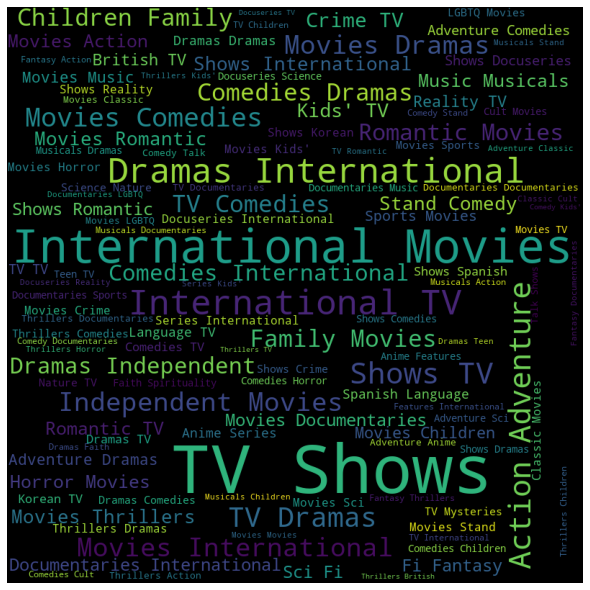

In [ ]:
# Devansh Mahant

names = ' '                                                  
for name in df.listed_in:
    name = str(name)
    names = names + name + ' '
 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black',  
                min_font_size = 10).generate(names) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

The above code cell is a visual representation in which the size of the text of each genre indicates its frequency or importance.




Text(0, 0.5, 'No. of movies and TV shows')

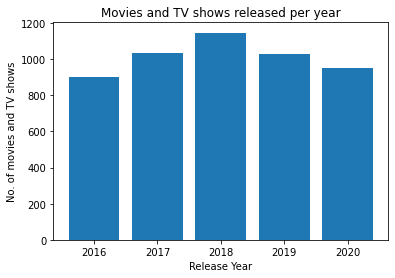

In [ ]:
top_5_year = df.groupby('release_year').count().sort_values('title',ascending=False).head(5)          #Aakash Chaurasia, Kartik Bhamare and Aditya Tiwari
top_5_year.reset_index(inplace=True)
top_5_year
plt.bar(top_5_year.release_year,top_5_year.title);
plt.title('Movies and TV shows released per year')
plt.xlabel('Release Year')
plt.ylabel('No. of movies and TV shows')

The above code cell returns a visual representation of the top five highest numbers of movies nad tv shows released in a particular year.from the above visualtion we can clearly see that other than 2021 the last few years have seen the highest number of releases movies and tv shows.  

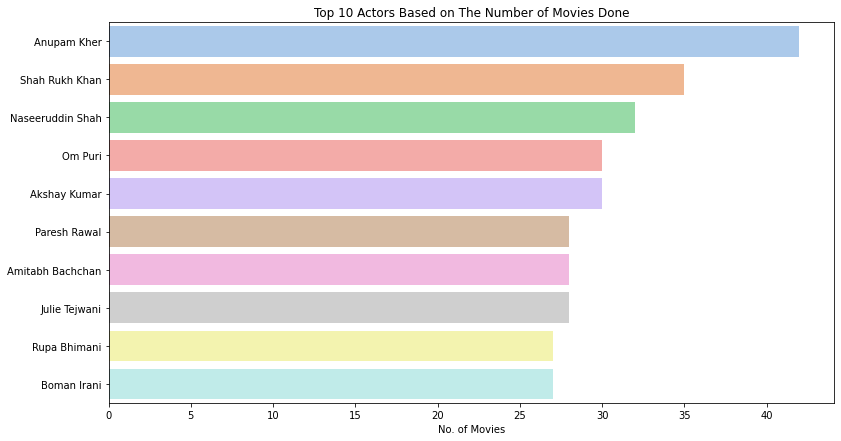

In [ ]:
df_Movies = df[df['type']=='Movie']                                                                #Abhishek Dubey and Aditya Tiwari
filtered_cast_movie = df_Movies[df_Movies.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actors Based on The Number of Movies Done')
sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], palette='pastel')
plt.xlabel('No. of Movies')
plt.show()

The above code cell returns a visualisation which plots a bar graph for the number of movies in which a particular actor has acted in and displays the top 10 actors having acted in the most number of movies .

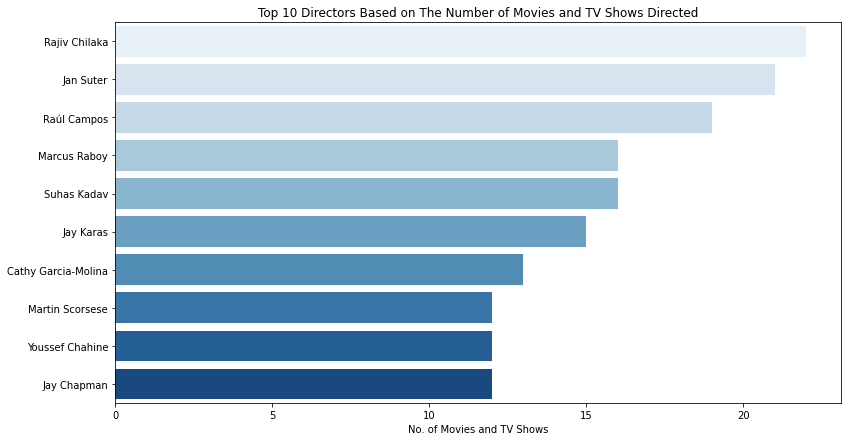

In [ ]:
#Pruthviraj Digambar Kamble and Aditya Tiwari
filtered_directors = df[df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Directors Based on The Number of Movies and TV Shows Directed')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='Blues')
plt.xlabel('No. of Movies and TV Shows')
plt.show()

The above code cell returns a visualisation which plots a bar graph for the number of movies and TV shows directed by a particular director and shows the top 10 directors having directed the most number of movies and TV shows.

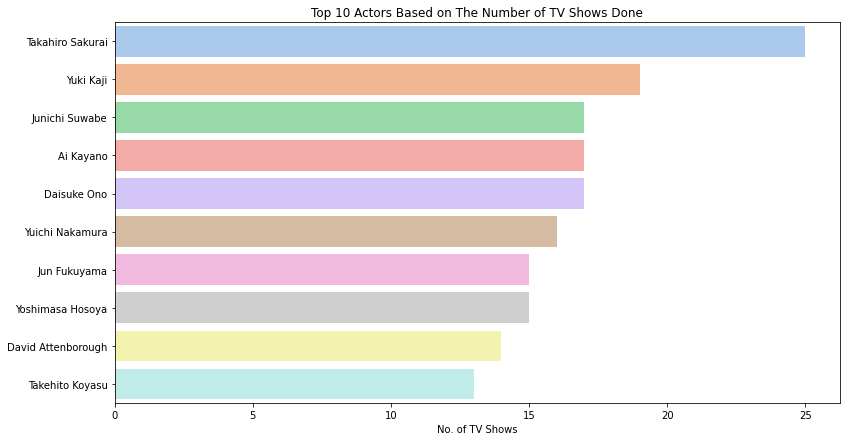

In [ ]:
#Pruthviraj Digambar Kamble and Aditya Tiwari
df_TV_Shows = df[df['type']=='TV Show']
filtered_cast_shows = df_TV_Shows[df_TV_Shows.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actors Based on The Number of TV Shows Done')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.xlabel('No. of TV Shows')
plt.show()

The above code cell returns a visualisation which plots a bar graph for the number of TV shows in which a perticular actor as acted in  and shows the top 10 actors having acted in the most number of TV shows.

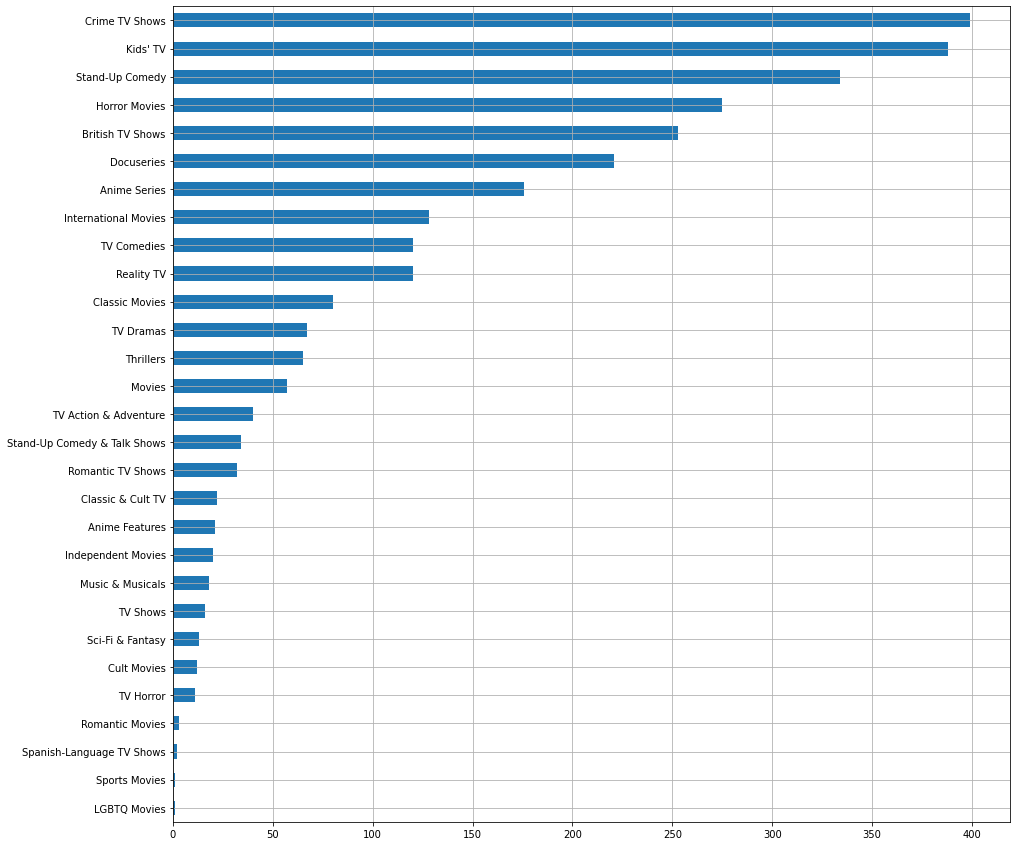

In [ ]:
df = df.rename(columns={"listed_in":"genre"})      #Devansh Mahant
df['genre'] = df['genre'].apply(lambda x: x.split(",")[0])
df['genre'].value_counts().sort_values(ascending=True).iloc[1:30].plot(kind='barh', figsize=(15,15))
plt.grid()
plt.show()

The above code cell prints the number of movies and tv shows belonging to a particular Genre present in the dataframe coloumn listed_in (genre).

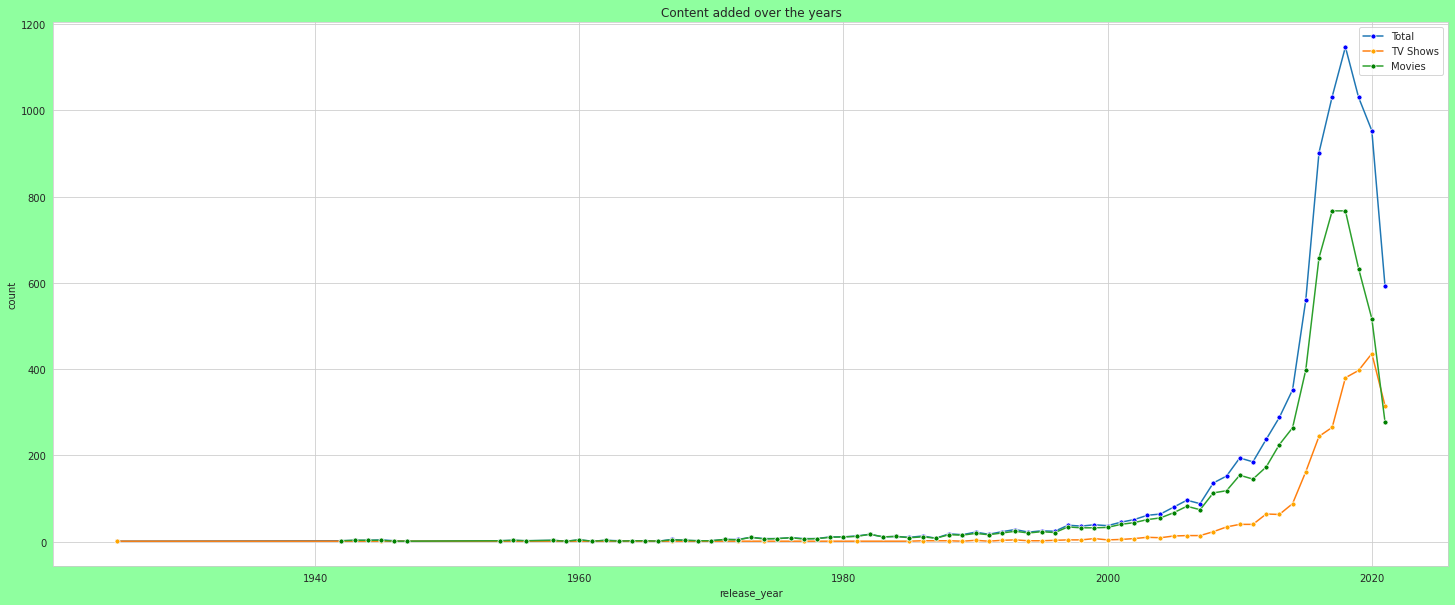

In [ ]:
# Abhishek Dubey and Aditya Tiwari
x=plt.figure(figsize=(25,10))
x.set_facecolor("xkcd:mint green")
sns.set_style("whitegrid")
plt.title("Content added over the years")
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]
col = "release_year"
vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc3 = df[col].value_counts().reset_index()
vc3 = vc3.rename(columns = {col : "count", "index" : col})
ax=sns.lineplot(x="release_year",y="count",data=vc3,label="Total",marker='o', markerfacecolor='blue', markersize=5)
ax=sns.lineplot(x="release_year",y="count",data=vc1,label="TV Shows",marker='o', markerfacecolor='orange', markersize=5)
ax=sns.lineplot(x="release_year",y="count",data=vc2,label="Movies",marker='o', markerfacecolor='green', markersize=5)
plt.subplot(ax)
plt.show()

The above code cell returns a visualisation which is a line graph and displays the relation between the release year and the number of T.V shows, Movies and the total number of T.V shows and Movies which were released in that year.This visualisation helps us to understand the trends in the number of releases of Movies and T.V shows every year over the years.

#Inferences

As for by performing above operations we have drawn many interesting inferences from the dataset Netflix titles; here’s a summary of the few of them:
 
a. The most content type on Netflix is movies,
b. The popular streaming platform started gaining traction after 2014. Since then, the amount of content added has been increasing significantly,
c. The country by the amount of the produces content is the United States,
d. The most popular director on Netflix , with the most titles, is Jan Suter.
e. International Movies is a genre that is mostly in Netflix.
f. The largest count of Netflix content is made with a “TV-MA” rating .
